<img src="https://www.promocionachile.cl/img/logos/uai.JPG" width="400" alt="utfsm-logo" align="left"/>

# LEC de Probabilidad y Estadística, Viña del mar.
## Clase 08
### Profesores: Gustavo Arcaya - Eduardo Rúbio

# Objetivos:
* Introducir teóricamente modelos de regresión lineal simple.
* Encontrar Intervalos de confianza y test de hipótesis para un modelo de regresión.

### Regresión Lineal Simple
Algo sobre regresion
    
    
    
    
Utilizaremos la base de datos `mtcars` incluida en la libreria `car`

In [1]:
#install.packages('car')
library('car')

Loading required package: carData



In [2]:
?mtcars

mtcars                package:datasets                 R Documentation

_M_o_t_o_r _T_r_e_n_d _C_a_r _R_o_a_d _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data was extracted from the 1974 _Motor Trend_ US magazine,
     and comprises fuel consumption and 10 aspects of automobile design
     and performance for 32 automobiles (1973-74 models).

_U_s_a_g_e:

     mtcars
     
_F_o_r_m_a_t:

     A data frame with 32 observations on 11 (numeric) variables.

       [, 1]  mpg   Miles/(US) gallon                        
       [, 2]  cyl   Number of cylinders                      
       [, 3]  disp  Displacement (cu.in.)                    
       [, 4]  hp    Gross horsepower                         
       [, 5]  drat  Rear axle ratio                          
       [, 6]  wt    Weight (1000 lbs)                        
       [, 7]  qsec  1/4 mile time                            
       [, 8]  vs    Engine (0 = V-shaped, 1 = straight)      
       [, 9]  am    Transmission (0 = automatic, 1 = manual) 
       [,10]  gear  Number of forward gears                  
       [,11]  carb  Number of carburetors                    
      
_N_o_t_e:

     Henderson and Velleman (1981) comment in a footnote to Table 1:
     'Hocking [original transcriber]'s noncrucial coding of the Mazda's
     rotary engine as a straight six-cylinder engine and the Porsche's
     flat engine as a V engine, as well as the inclusion of the diesel
     Mercedes 240D, have been retained to enable direct comparisons to
     be made with previous analyses.'

_S_o_u_r_c_e:

     Henderson and Velleman (1981), Building multiple regression models
     interactively.  _Biometrics_, *37*, 391-411.

_E_x_a_m_p_l_e_s:

     require(graphics)
     pairs(mtcars, main = "mtcars data", gap = 1/4)
     coplot(mpg ~ disp | as.factor(cyl), data = mtcars,
            panel = panel.smooth, rows = 1)
     ## possibly more meaningful, e.g., for summary() or bivariate plots:
     mtcars2 <- within(mtcars, {
        vs <- factor(vs, labels = c("V", "S"))
        am <- factor(am, labels = c("automatic", "manual"))
        cyl  <- ordered(cyl)
        gear <- ordered(gear)
        carb <- ordered(carb)
     })
     summary(mtcars2)

In [3]:
data =  mtcars

In [4]:
head(data)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


Veamos una aproximaxición de las gráficas que obtenemos al comparar las variables de a pares

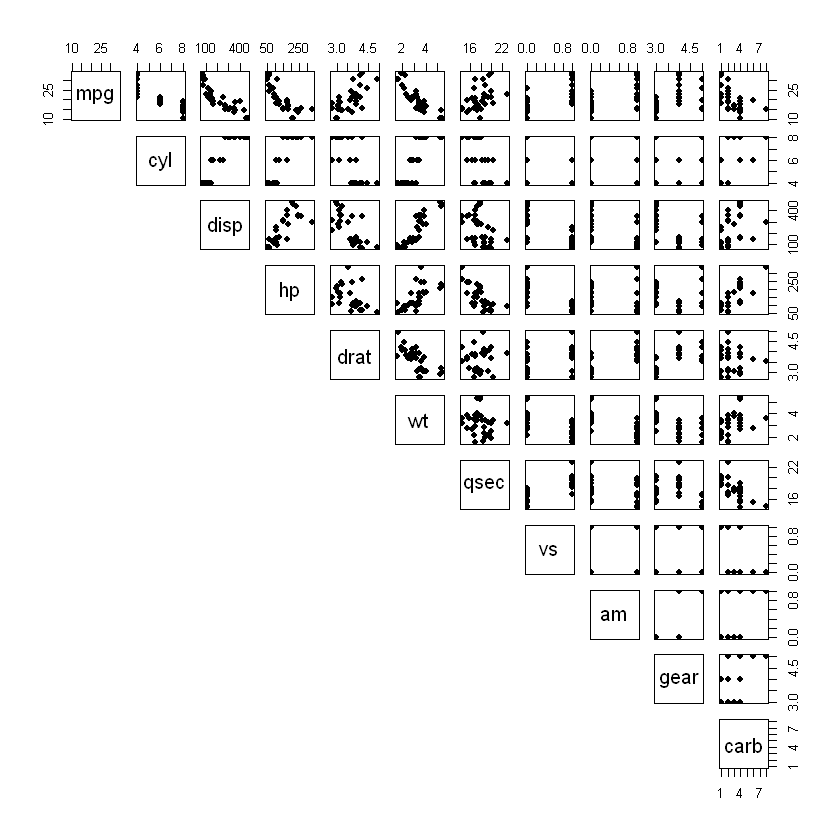

In [5]:
pairs(data[,1:11], pch = 19, lower.panel = NULL)

Y su matriz de correlaciones (simétrica)

In [6]:
cor(data)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284


corrplot 0.92 loaded



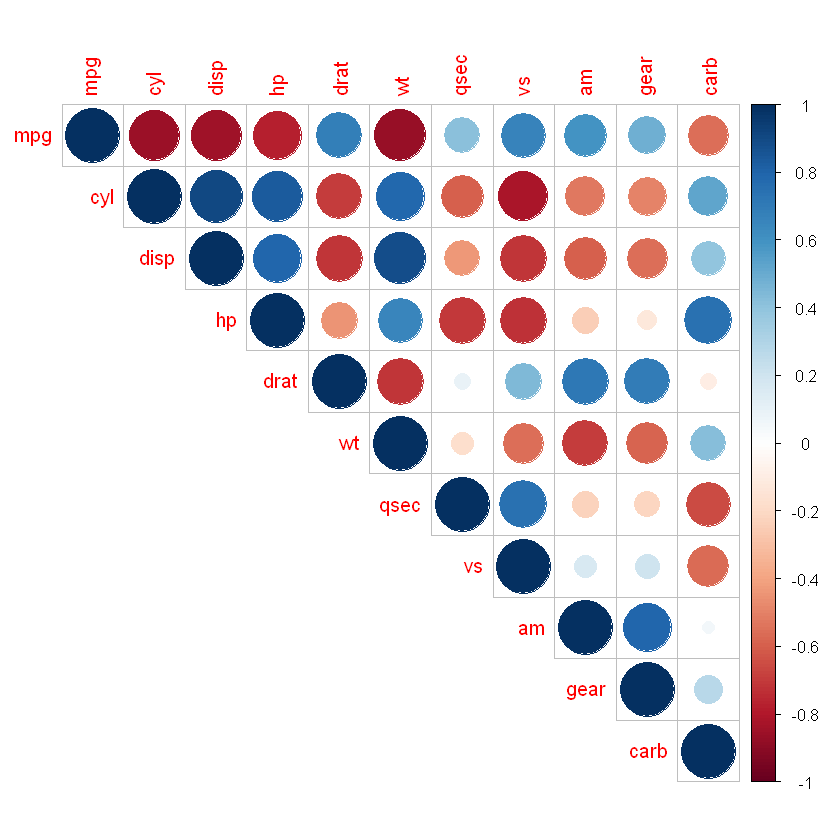

In [7]:
#install.packages("corrplot")
library(corrplot)
corrplot(cor(data), type = "upper")

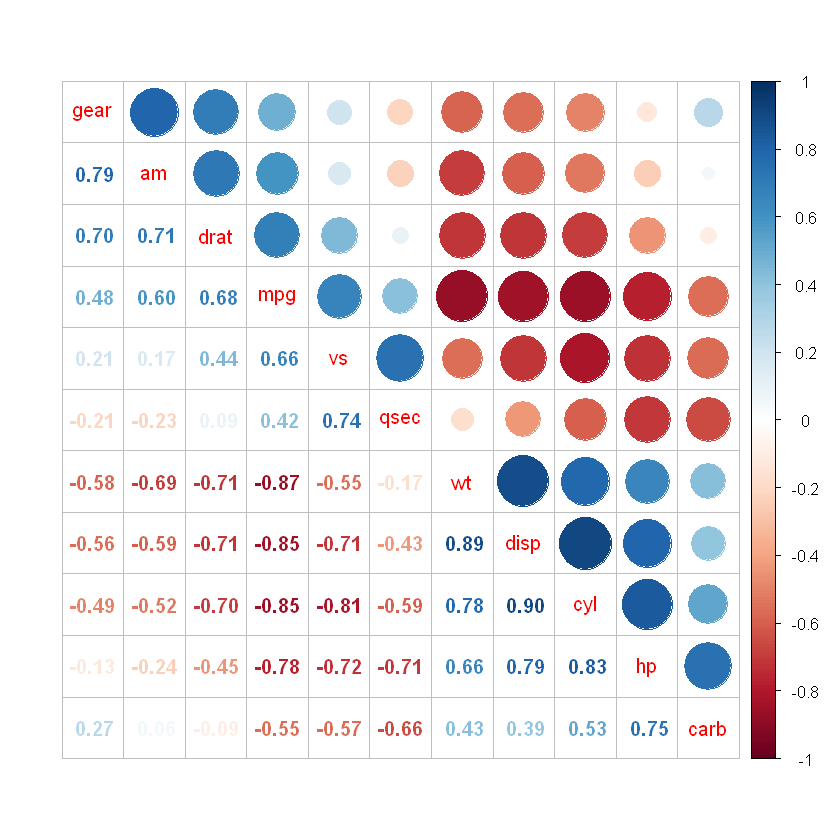

In [8]:
corrplot.mixed(cor(data), order = 'AOE')

Veamos en detalle algunas de los gráficos de la variable de rendimiento `mpg` respecto a las demás variables registradas en el dataframe

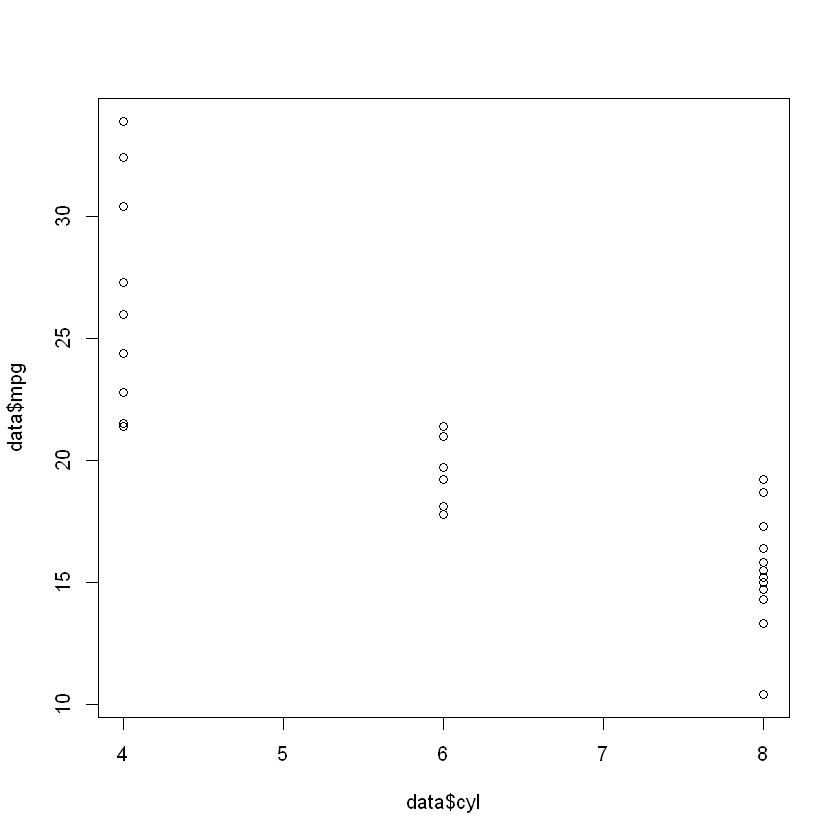

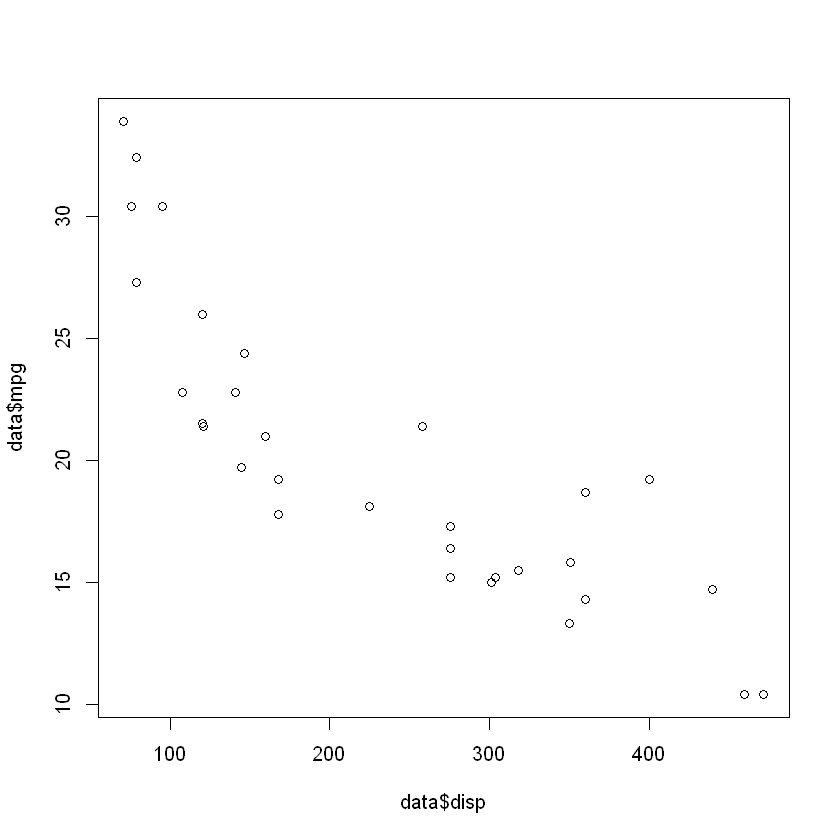

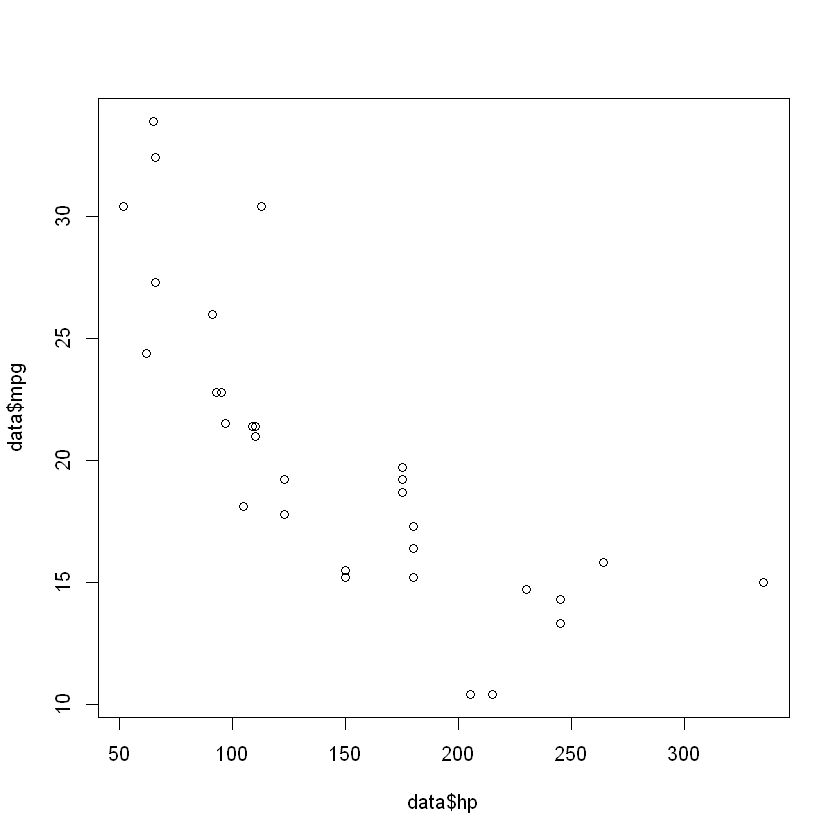

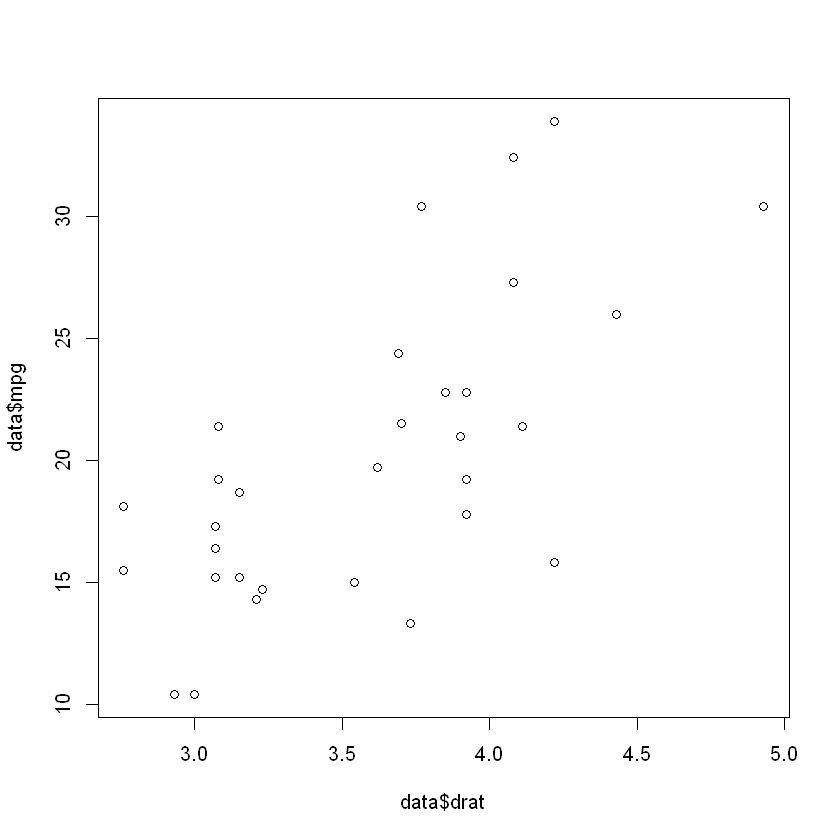

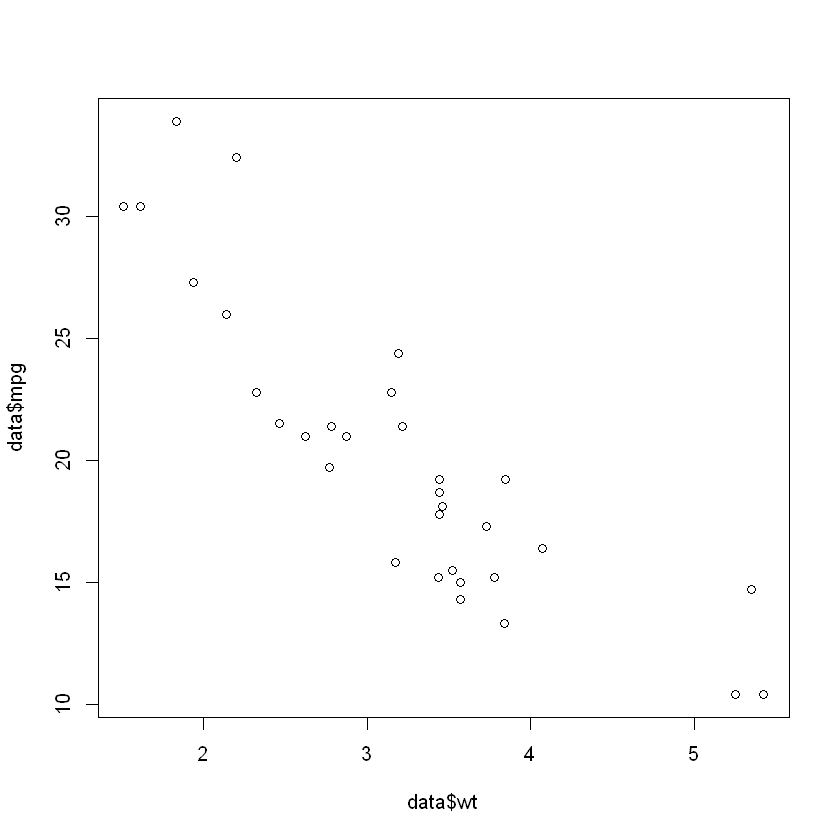

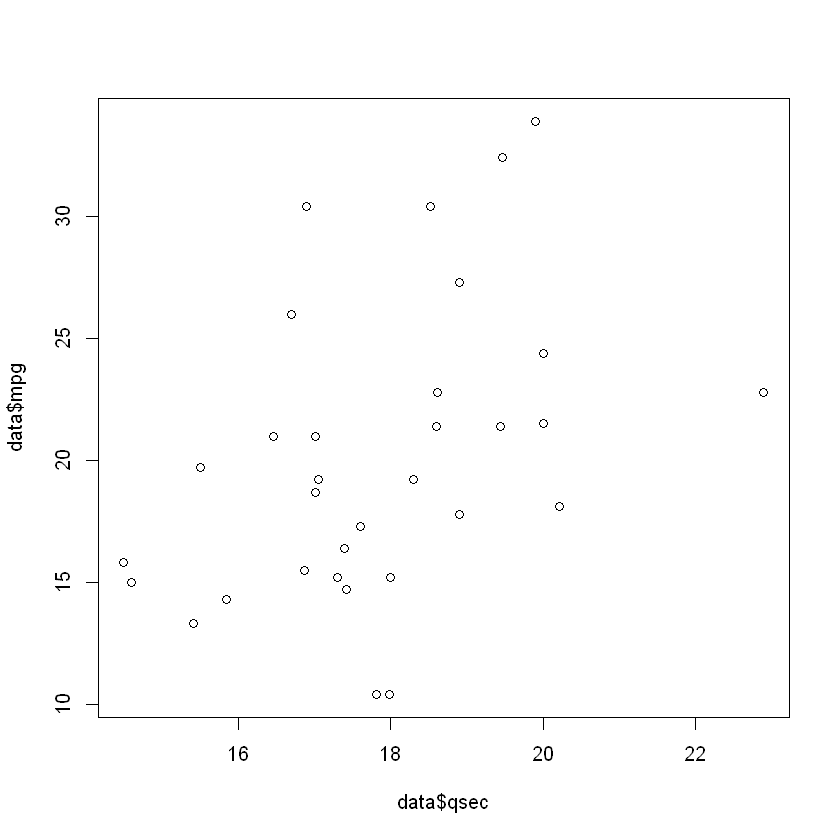

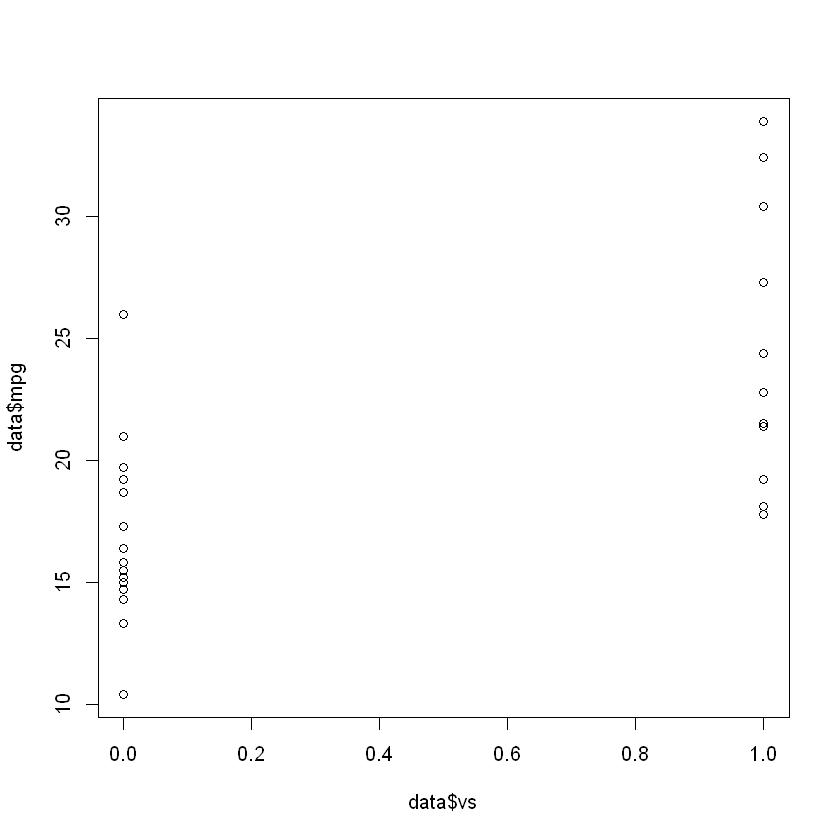

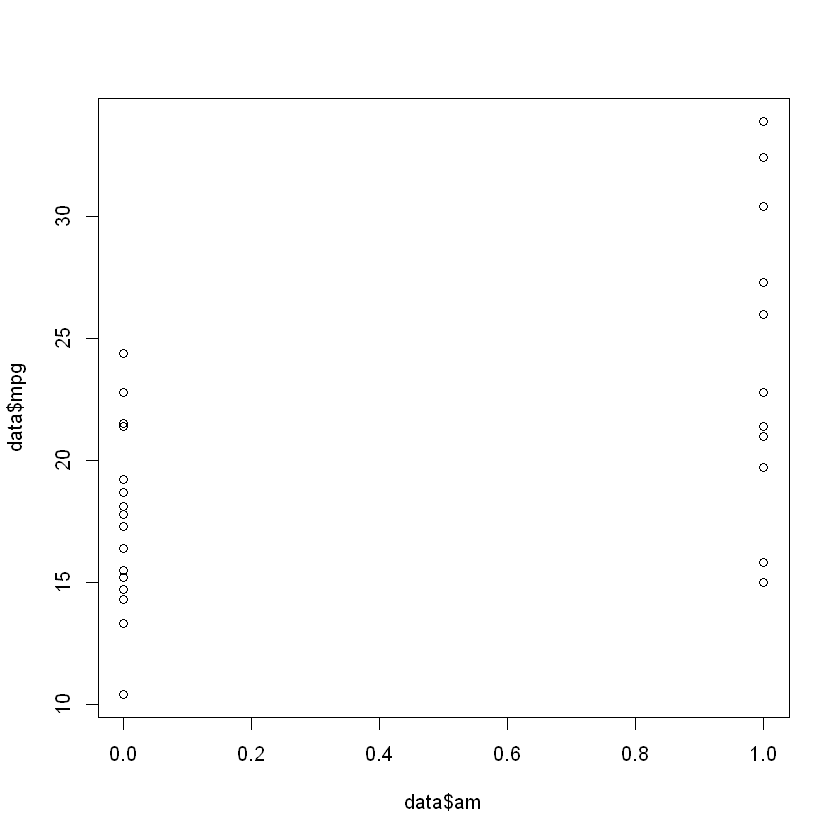

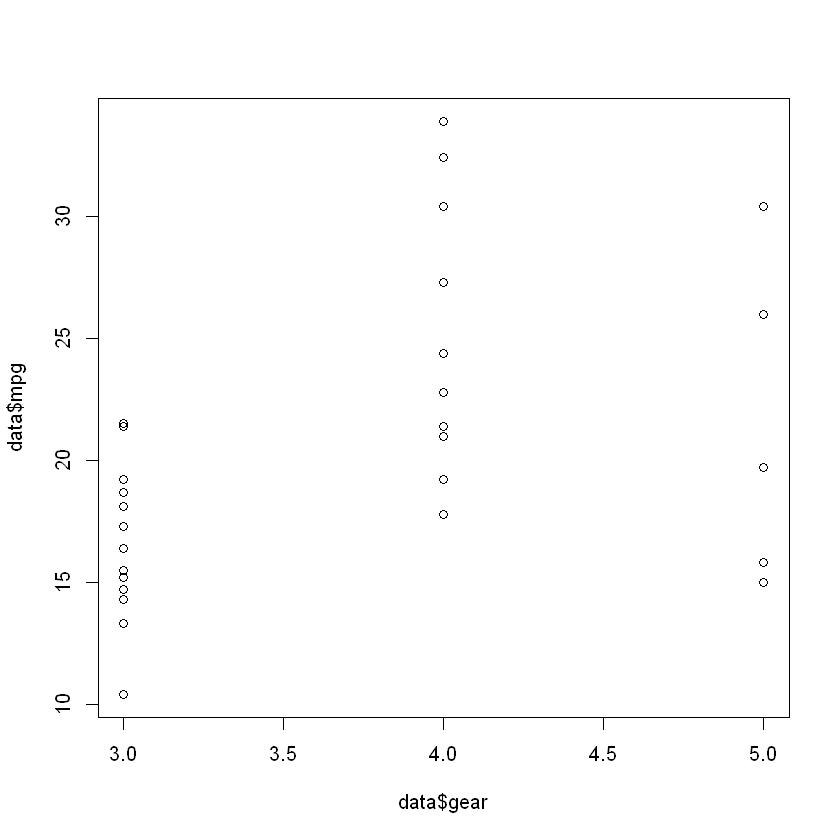

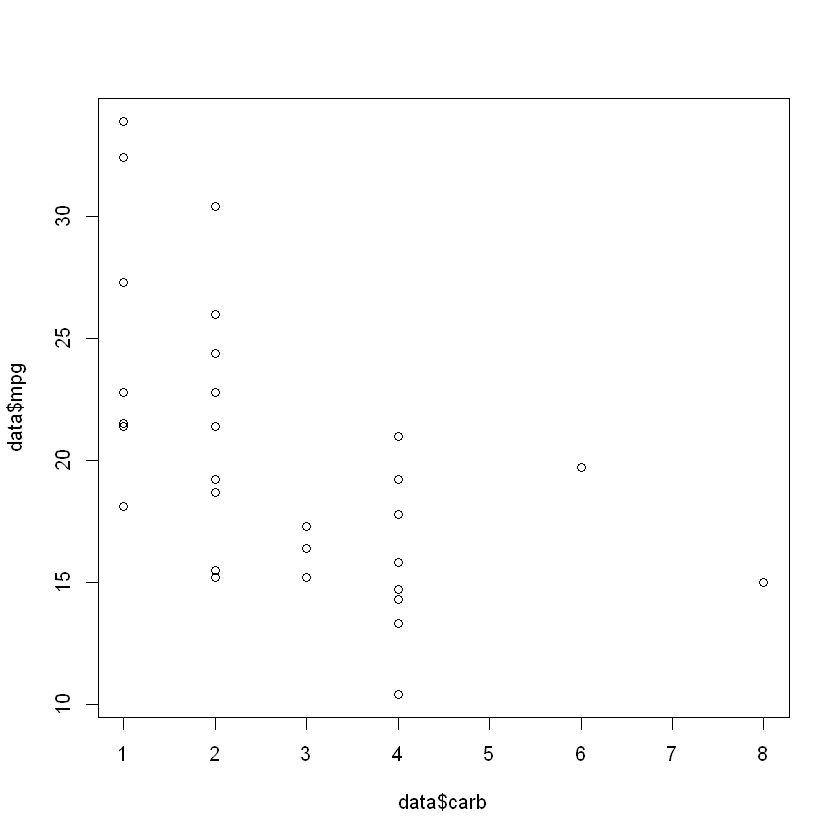

In [9]:
plot(data$cyl,data$mpg)
plot(data$disp,data$mpg)
plot(data$hp,data$mpg)
plot(data$drat,data$mpg)
plot(data$wt,data$mpg)
plot(data$qsec,data$mpg)
plot(data$vs,data$mpg)
plot(data$am,data$mpg)
plot(data$gear,data$mpg)
plot(data$carb,data$mpg)

#### Consideremos entonces los modelos de regresión lineal para estas combinaciones de variables

In [10]:
reg1 = lm(mpg ~ cyl, data)
summary(reg1)


Call:
lm(formula = mpg ~ cyl, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9814 -2.1185  0.2217  1.0717  7.5186 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.8846     2.0738   18.27  < 2e-16 ***
cyl          -2.8758     0.3224   -8.92 6.11e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.206 on 30 degrees of freedom
Multiple R-squared:  0.7262,	Adjusted R-squared:  0.7171 
F-statistic: 79.56 on 1 and 30 DF,  p-value: 6.113e-10


In [11]:
confint(reg1)

,2.5 %,97.5 %
(Intercept),33.649223,42.119930
cyl,-3.534237,-2.217343


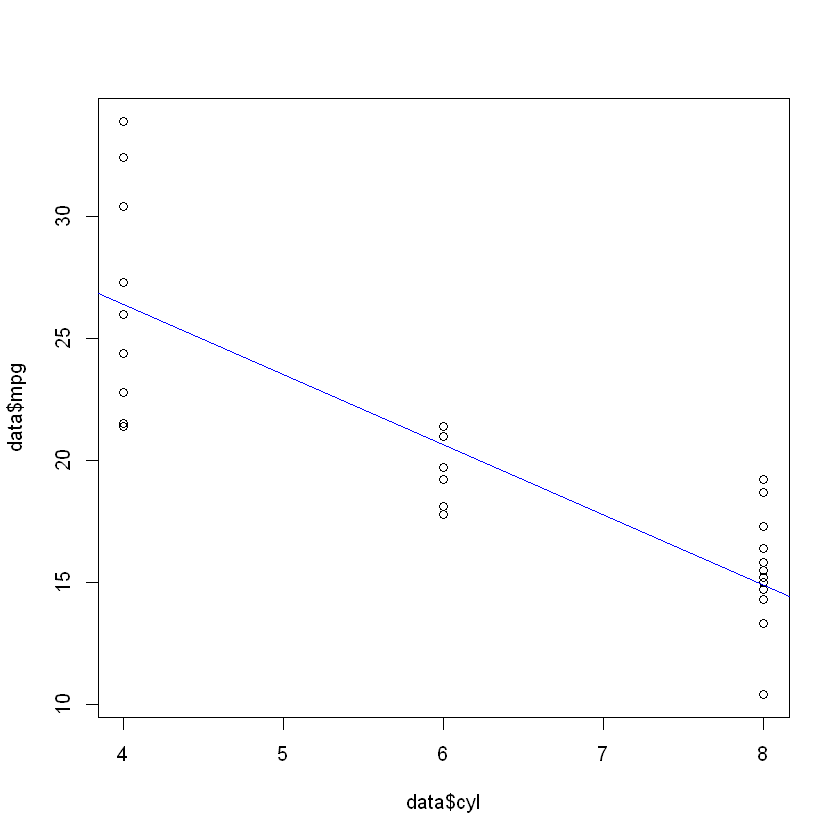

In [12]:
plot(data$cyl, data$mpg)
abline(reg1, col = 'blue')

In [13]:
reg2 = lm(mpg ~ disp, data)
summary(reg1)


Call:
lm(formula = mpg ~ cyl, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9814 -2.1185  0.2217  1.0717  7.5186 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.8846     2.0738   18.27  < 2e-16 ***
cyl          -2.8758     0.3224   -8.92 6.11e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.206 on 30 degrees of freedom
Multiple R-squared:  0.7262,	Adjusted R-squared:  0.7171 
F-statistic: 79.56 on 1 and 30 DF,  p-value: 6.113e-10


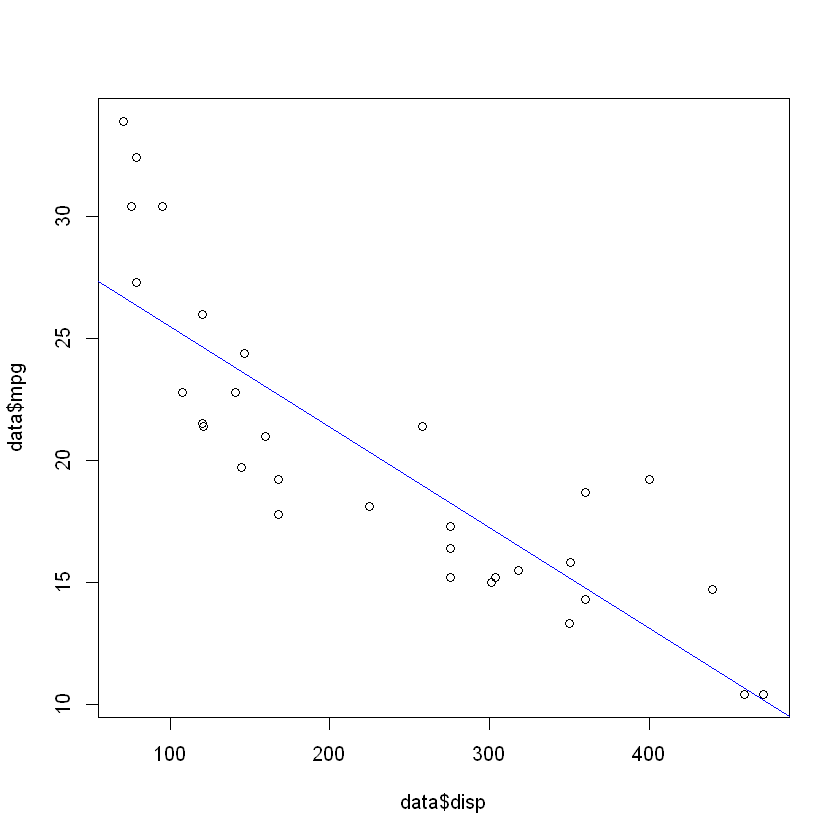

In [14]:
plot(data$disp, data$mpg)
abline(reg2, col = 'blue')

In [15]:
reg3 = lm(mpg ~ hp, data)
summary(reg3)


Call:
lm(formula = mpg ~ hp, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


In [16]:
confint(reg3)

,2.5 %,97.5 %
(Intercept),26.76194879,33.4357723
hp,-0.08889465,-0.0475619


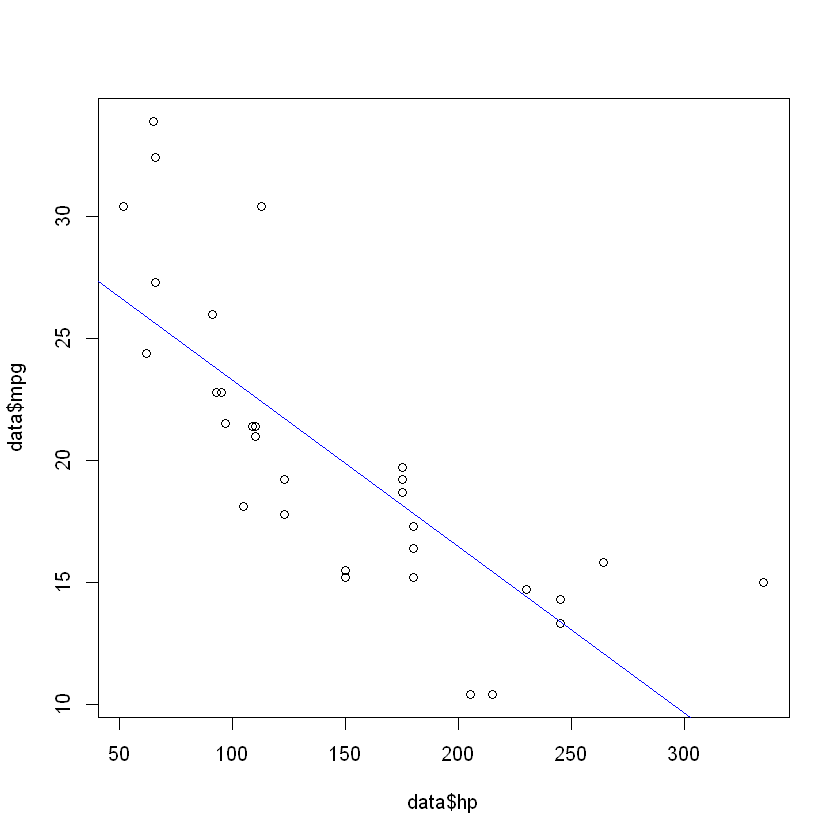

In [17]:
plot(data$hp, data$mpg)
abline(reg3, col = 'blue')

In [18]:
reg4 = lm(mpg ~ drat, data)
summary(reg4)


Call:
lm(formula = mpg ~ drat, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0775 -2.6803 -0.2095  2.2976  9.0225 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -7.525      5.477  -1.374     0.18    
drat           7.678      1.507   5.096 1.78e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.485 on 30 degrees of freedom
Multiple R-squared:  0.464,	Adjusted R-squared:  0.4461 
F-statistic: 25.97 on 1 and 30 DF,  p-value: 1.776e-05


In [19]:
confint(reg4)

,2.5 %,97.5 %
(Intercept),-18.70946,3.660219
drat,4.60113,10.755335


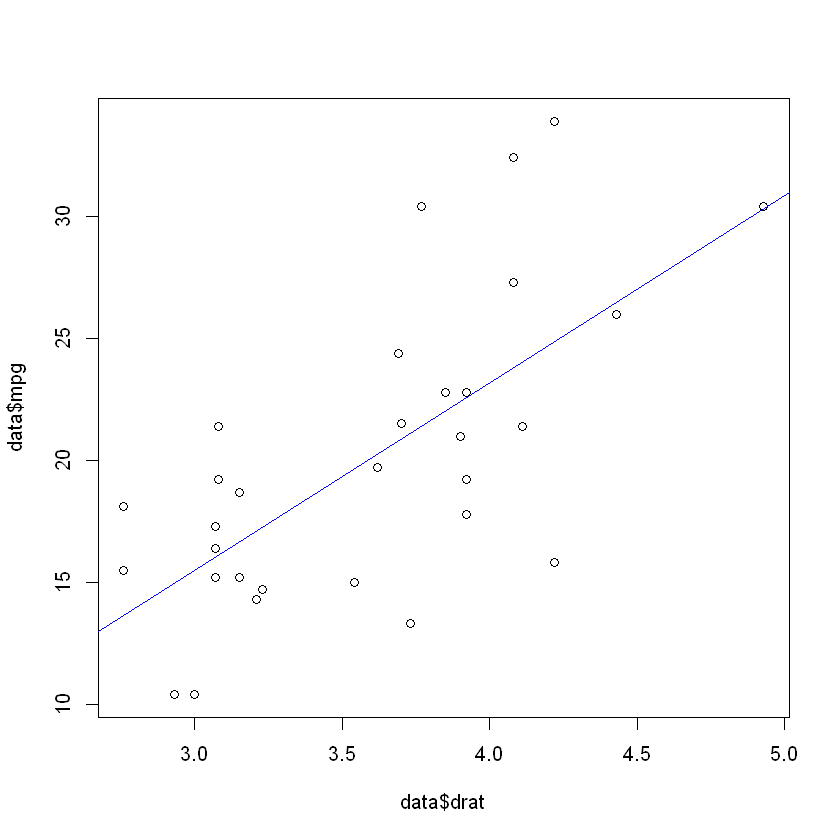

In [20]:
plot(data$drat, data$mpg)
abline(reg4, col = 'blue')

In [21]:
reg5 = lm(mpg ~ wt, data)
summary(reg5)


Call:
lm(formula = mpg ~ wt, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


In [22]:
confint(reg5)

,2.5 %,97.5 %
(Intercept),33.450500,41.119753
wt,-6.486308,-4.202635


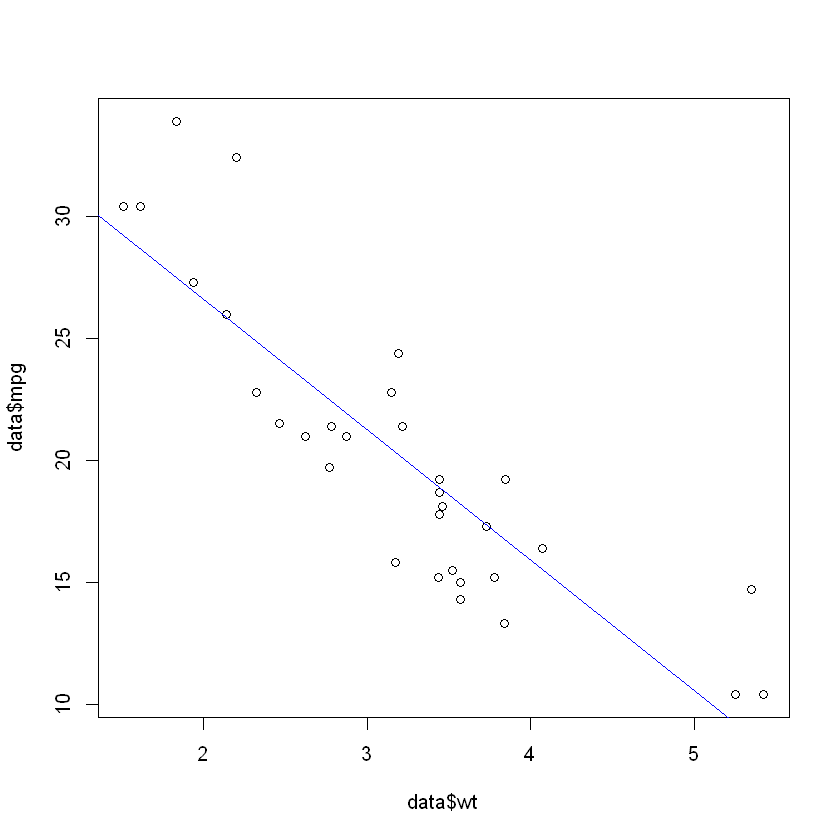

In [23]:
plot(data$wt, data$mpg)
abline(reg5, col = 'blue')

In [24]:
reg6 = lm(mpg ~ qsec, data)
summary(reg6)  ### USAR PARA EJEMPLO DE TEST INDIVIDUAL EN LA CLASE


Call:
lm(formula = mpg ~ qsec, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8760 -3.4539 -0.7203  2.2774 11.6491 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -5.1140    10.0295  -0.510   0.6139  
qsec          1.4121     0.5592   2.525   0.0171 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.564 on 30 degrees of freedom
Multiple R-squared:  0.1753,	Adjusted R-squared:  0.1478 
F-statistic: 6.377 on 1 and 30 DF,  p-value: 0.01708


In [25]:
confint(reg6)

,2.5 %,97.5 %
(Intercept),-25.5970982,15.369022
qsec,0.2700654,2.554184


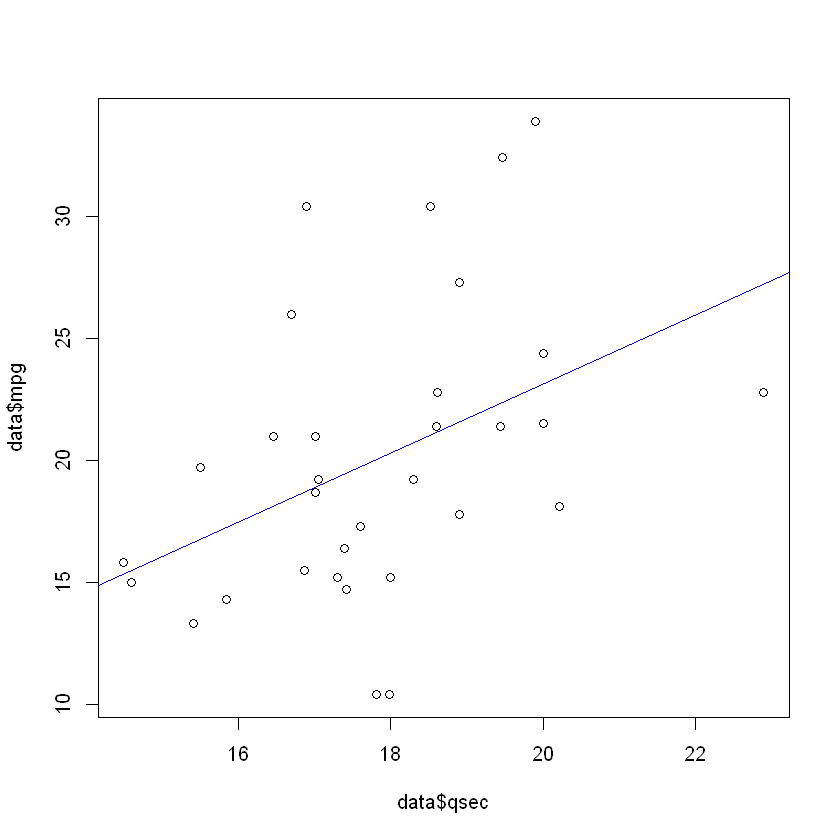

In [26]:
plot(data$qsec, data$mpg)
abline(reg6, col = 'blue')

In [27]:
reg7 = lm(mpg ~ vs, data)
summary(reg7)


Call:
lm(formula = mpg ~ vs, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-6.757 -3.082 -1.267  2.828  9.383 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   16.617      1.080  15.390 8.85e-16 ***
vs             7.940      1.632   4.864 3.42e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.581 on 30 degrees of freedom
Multiple R-squared:  0.4409,	Adjusted R-squared:  0.4223 
F-statistic: 23.66 on 1 and 30 DF,  p-value: 3.416e-05


In [28]:
confint(reg7)

,2.5 %,97.5 %
(Intercept),14.411602,18.82173
vs,4.606732,11.27422


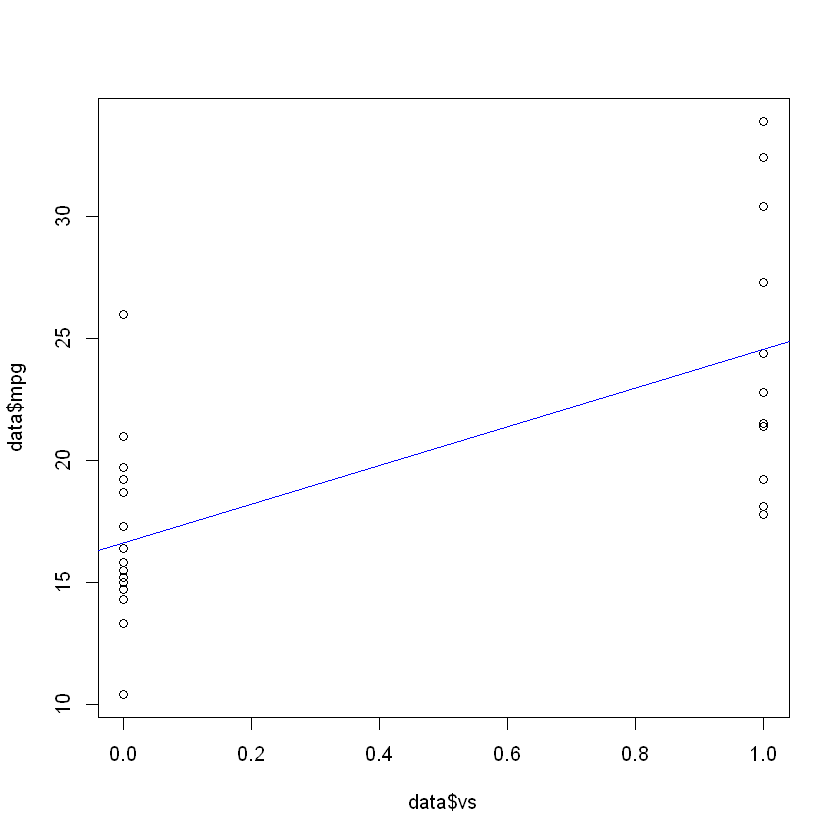

In [29]:
plot(data$vs, data$mpg)
abline(reg7, col = 'blue')

In [30]:
reg8 = lm(mpg ~ am, data)
summary(reg8)


Call:
lm(formula = mpg ~ am, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3923 -3.0923 -0.2974  3.2439  9.5077 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   17.147      1.125  15.247 1.13e-15 ***
am             7.245      1.764   4.106 0.000285 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.902 on 30 degrees of freedom
Multiple R-squared:  0.3598,	Adjusted R-squared:  0.3385 
F-statistic: 16.86 on 1 and 30 DF,  p-value: 0.000285


In [31]:
confint(reg8)

,2.5 %,97.5 %
(Intercept),14.85062,19.44411
am,3.64151,10.84837


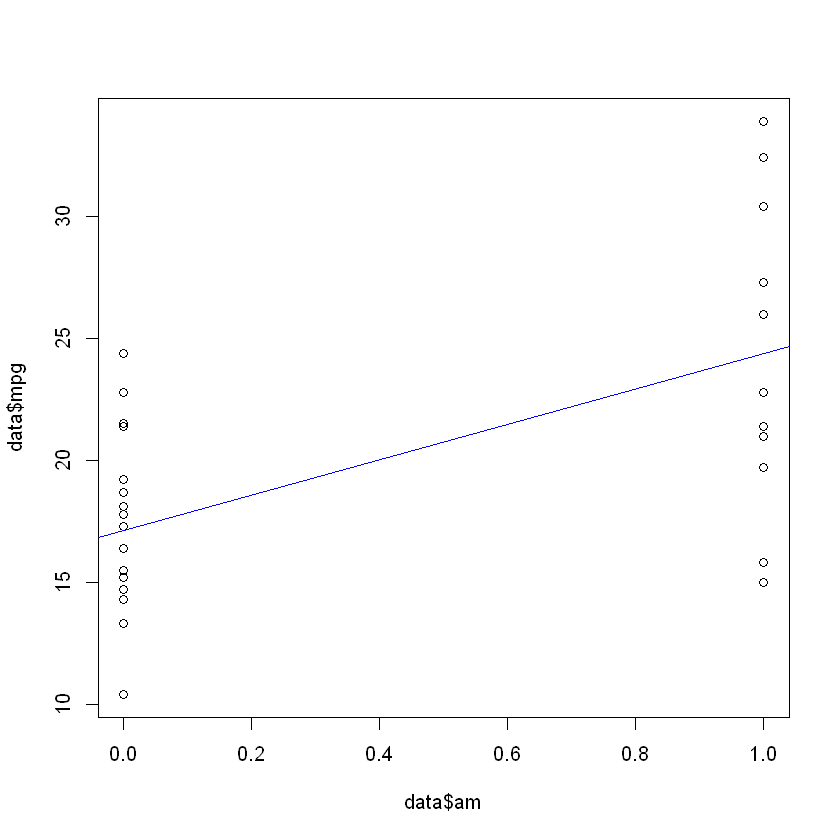

In [32]:
plot(data$am, data$mpg)
abline(reg8, col = 'blue')

In [33]:
reg9 = lm(mpg ~ gear, data)
summary(reg9)


Call:
lm(formula = mpg ~ gear, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.240  -2.793  -0.205   2.126  12.583 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    5.623      4.916   1.144   0.2618   
gear           3.923      1.308   2.999   0.0054 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.374 on 30 degrees of freedom
Multiple R-squared:  0.2307,	Adjusted R-squared:  0.205 
F-statistic: 8.995 on 1 and 30 DF,  p-value: 0.005401


In [34]:
confint(reg9)

,2.5 %,97.5 %
(Intercept),-4.417252,15.663919
gear,1.251774,6.594893


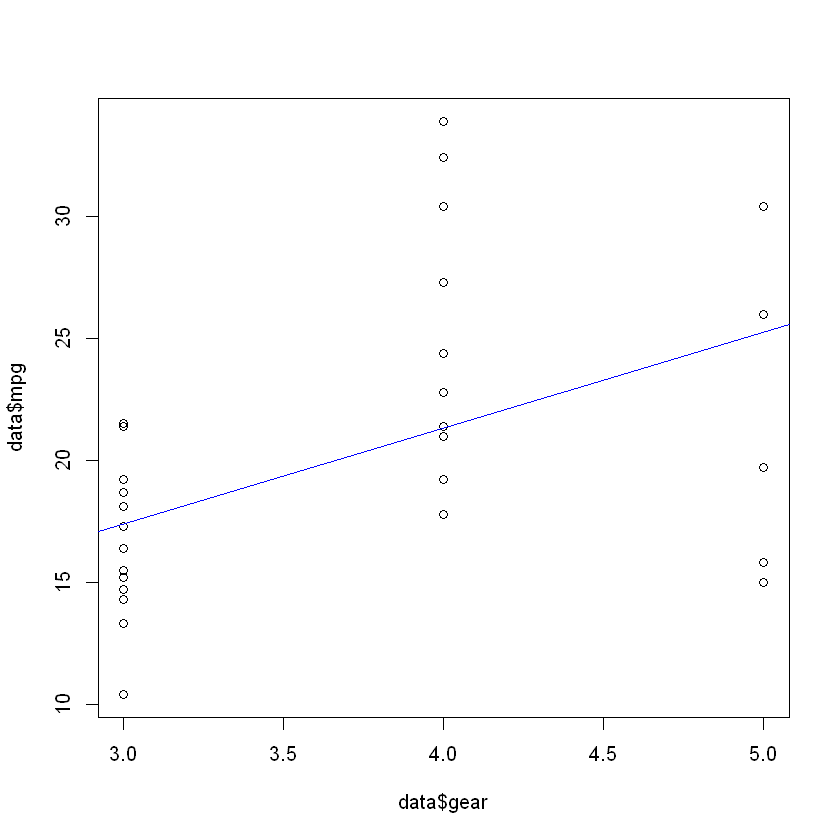

In [35]:
plot(data$gear, data$mpg)
abline(reg9, col = 'blue')

In [36]:
reg10= lm(mpg ~ carb, data)
summary(reg10)


Call:
lm(formula = mpg ~ carb, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-7.250 -3.316 -1.433  3.384 10.083 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25.8723     1.8368  14.085 9.22e-15 ***
carb         -2.0557     0.5685  -3.616  0.00108 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.113 on 30 degrees of freedom
Multiple R-squared:  0.3035,	Adjusted R-squared:  0.2803 
F-statistic: 13.07 on 1 and 30 DF,  p-value: 0.001084


In [37]:
confint(reg10)

,2.5 %,97.5 %
(Intercept),22.121073,29.6235946
carb,-3.216844,-0.8945936


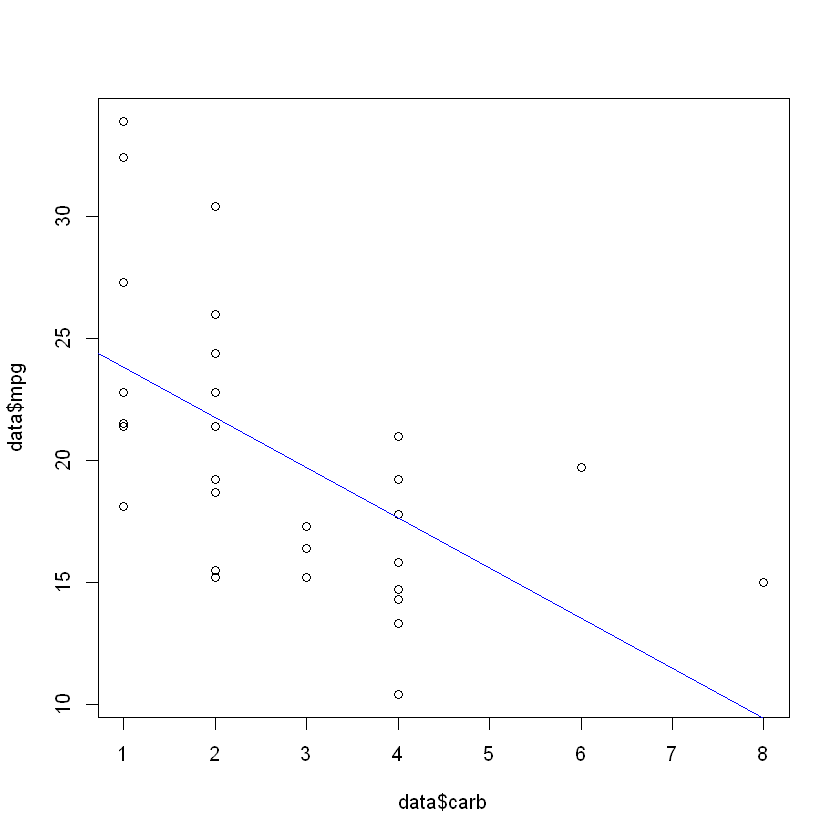

In [38]:
plot(data$carb, data$mpg)
abline(reg10, col = 'blue')

## Comentarios sobre los resultados
* Para conseguir un mejor ajuste (según $R^2$ u otro criterio adecuado) se puede proponer una transformación de las variables regresoras, por ejemplo, considerando su logaritmo.
* Utilizando el método `summary` obtenemos la significancia de cada coeficiente calculado por el comando de regresión lineal (Detallaremos más adelante).

-----------------
-----------------

### Los coeficientes obtenidos para el `intercepto` y de las `variables regresoras` son estimaciones de sus valores reales (o poblacionales). Para estudiarlos recurrimos a diversos tests de hipótesis

## Tests sobre Regresiones lineales
1. **Test individual**
Para un modelo de regresión lineal simple $y = b_0 + b_1 x_1 + b_2 x_2 + \ldots + b_n x_n$ evaluamos el siguiente test de hipótesis

\begin{align*}
H_0 &: b_i = 0  \\
H_1 &: b_i \neq 0 
\end{align*}

Evaluaremos el estadístico de prueba dado por
\begin{equation}
 \tilde{t}  = \dfrac{b_j}{S b_j} \sim t_{\left(\frac{\alpha}{2}, n-k-1\right)}
\end{equation}
Donde, $\alpha$ es la significancia del test, $n$ es el tamaño de la muestra y $k$ es el número de variables regresoras (a veces llamado grados de libertad del modelo).

OBS: **Si el estadístico de prueba es tal que $\vert \tilde{t} \vert > t_{\left(\frac{\alpha}{2}, n-k-1\right)}$ entonces se rechaza $H_0$, en cuyo caso, $b_i$ es significativamente distinta de cero.** ($x_i$ es una"buena" variable regresora)

En la práctica, esta información nos la entrega el comando `summary` como sigue

In [39]:
reg10= lm(mpg ~ carb, data)
summary(reg10)


Call:
lm(formula = mpg ~ carb, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-7.250 -3.316 -1.433  3.384 10.083 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25.8723     1.8368  14.085 9.22e-15 ***
carb         -2.0557     0.5685  -3.616  0.00108 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.113 on 30 degrees of freedom
Multiple R-squared:  0.3035,	Adjusted R-squared:  0.2803 
F-statistic: 13.07 on 1 and 30 DF,  p-value: 0.001084


Como ambos coeficientes indican una significancia de *** (asociado a una significancia del orden del 0, para el intercepto) y de ** (asociado a una significancia del orden del 0.1% , para el coeficiente de `carb`) concluimos que para ambos `no se rechaza H_0`, ambos coeficientes son prácticamente nulos.

2. Normalidad de los residuos.
Definimos los residuos del modelo a partir de los "errores de estimación" que se pueden visualizar como sigue

In [40]:
res6 = reg6$residuals

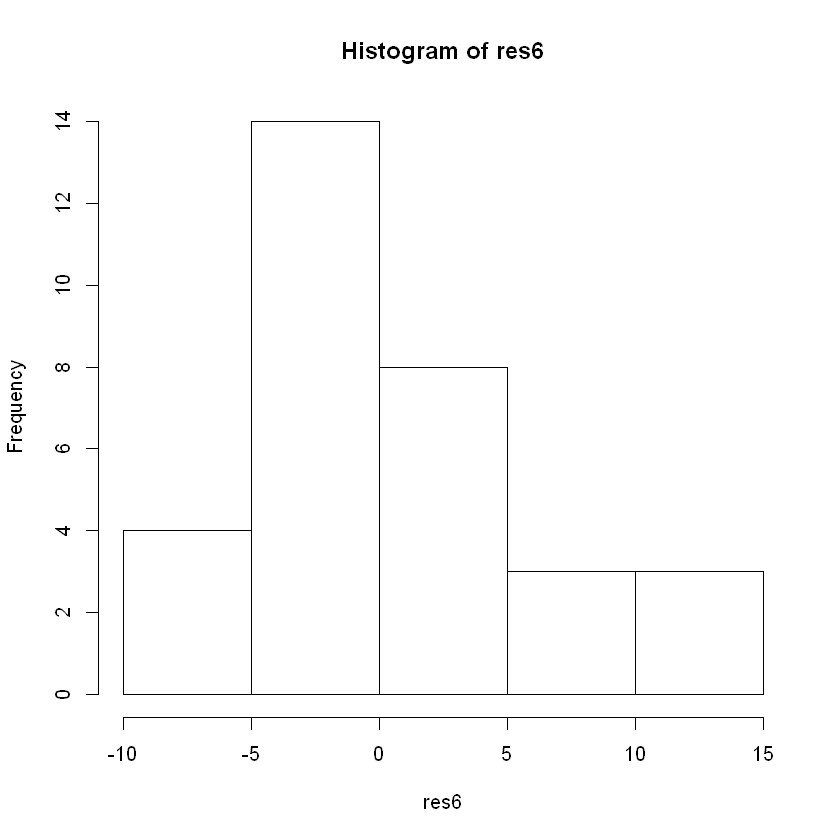

In [41]:
hist(res6)

Para estudiar la normalidad de estos residuos, consideraremos los denominados `residuos estudentizados` que se calculan como sigue

In [42]:
resT = rstudent(reg6)

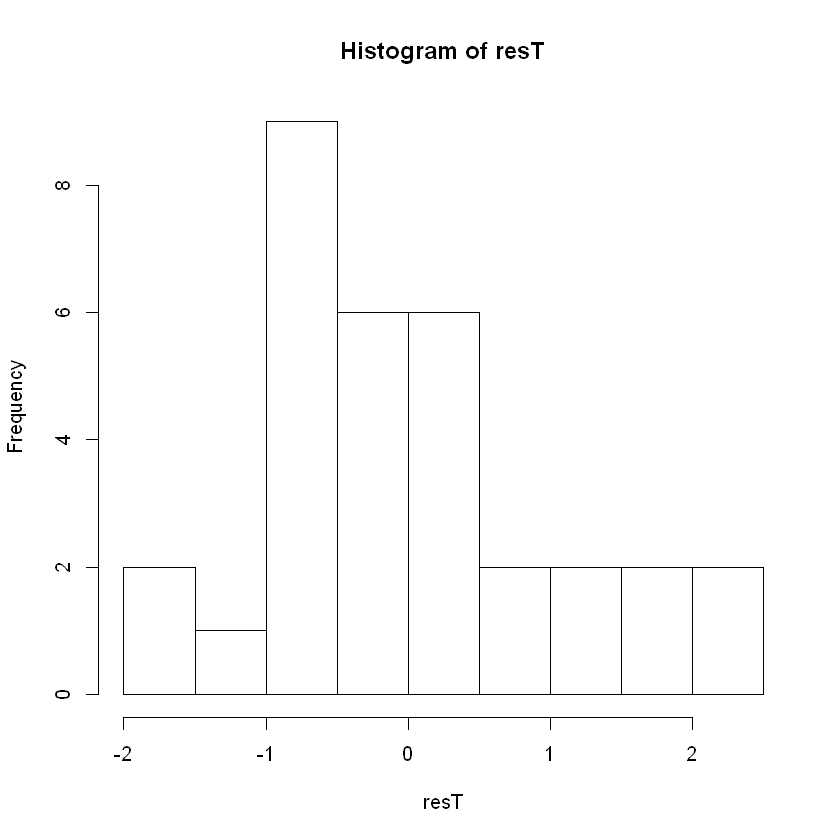

In [43]:
hist(resT)

Notemos que esta distribución tiene pinta de normal, para verificar esto utilizamos diversos test de hipótesis

* 2.1. Test de Shapiro-Wilks (para n<50):

\begin{align*}
            H_0 &: \text{Residuos distribuyen normal} \\
            H_1 &: \text{Residuos no distribuyen normal}
\end{align*}

![imgSW](Shapiro-Wilk.png)

En R invocamos este test con el siguiente comando:

In [44]:
shapiro.test(resT)


	Shapiro-Wilk normality test

data:  resT
W = 0.93996, p-value = 0.07469


En este caso el $p$-valor es mayor a $0.05$ por lo que no rechazamos la hipótesis nula.

----------------

* 2.2. Test de Kolmogorov-Smirnov (para algunos, test de Lilliefors) (se puede usar para n sobre 50)

\begin{align*}
            H_0 &: \text{Residuos distribuyen normal} \\
            H_1 &: \text{Residuos no distribuyen normal}
\end{align*}

El estadístico de prueba en este test es de mayor complejidad, pero lo podemos invocar con los siguientes comandos

In [45]:
#install.packages("nortest")
library(nortest)

In [46]:
lillie.test(resT)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  resT
D = 0.12718, p-value = 0.2087


En este caso el $p$-valor es aún mayor a $0.05$ por lo que no rechazamos la hipótesis nula.